In [1]:
import pandas as pd
import csv

In [2]:
ratings_raw = pd.read_csv('./dataset/ratings.csv', usecols=['userId', 'movieId', 'rating'])
ratings_raw.head()

userId  movieId  rating
0       1      110     1.0
1       1      147     4.5
2       1      858     5.0
3       1     1221     5.0
4       1     1246     5.0

In [3]:
ratings_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   rating   float64
dtypes: float64(1), int64(2)
memory usage: 595.6 MB


In [4]:
movies = pd.read_csv('./dataset/movies_processed.csv',  
                    usecols=['id', 'original_title']).rename(columns={'id': 'movieId'})

movies.head()

movieId               original_title
0      862                    Toy Story
1     8844                      Jumanji
2    15602             Grumpier Old Men
3    31357            Waiting to Exhale
4    11862  Father of the Bride Part II

## Filter `movieId` that is in processd movie dataset

In [5]:
ratings = pd.merge(ratings_raw, movies, on='movieId', how='inner')
ratings.head()

## shape: (3046222, 4)
## unique users: 241973
## unique movies: 1325

userId  movieId  rating        original_title
0       1      858     5.0  Sleepless in Seattle
1       3      858     4.0  Sleepless in Seattle
2       5      858     5.0  Sleepless in Seattle
3      12      858     4.0  Sleepless in Seattle
4      20      858     4.5  Sleepless in Seattle

<Axes: ylabel='Frequency'>

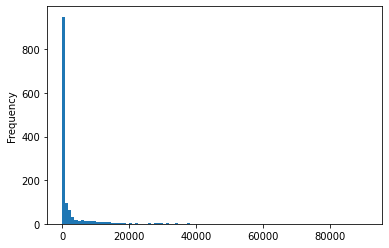

In [6]:
ratings.groupby('movieId').size().plot.hist(bins=100)

## Filter based on median rating score

In [7]:
ratings = ratings[ratings.rating >= 4.0] 

## shape: (1579354, 4)
## unique users: 211831
## unique movies: 1193

## Aggregate same user's rated movies

In [8]:
ratings.head()

userId  movieId  rating        original_title
0       1      858     5.0  Sleepless in Seattle
1       3      858     4.0  Sleepless in Seattle
2       5      858     5.0  Sleepless in Seattle
3      12      858     4.0  Sleepless in Seattle
4      20      858     4.5  Sleepless in Seattle

In [15]:
ratings_transformed = ratings.groupby('userId')[['movieId']].agg(lambda x: [str(item) for item in x]).reset_index()

In [16]:
ratings_transformed.head()

userId                         movieId
0       1         [858, 1246, 1968, 4226]
1       2                      [605, 628]
2       3                           [858]
3       4  [1645, 1909, 1911, 2023, 2355]
4       5                     [858, 1945]

In [17]:
# filter the users who has only one rated movie, 212k -> 164k
ratings_transformed = ratings_transformed.loc[ratings_transformed.movieId.apply(lambda x: len(x)) > 1]
ratings_transformed.movieId = ratings_transformed.movieId.map(lambda x: ' '.join(x))
ratings_transformed.head()

userId                   movieId
0       1        858 1246 1968 4226
1       2                   605 628
3       4  1645 1909 1911 2023 2355
4       5                  858 1945
5       7                   293 318

In [18]:
ratings_transformed.shape

(163556, 2)

In [21]:
ratings_transformed['movieId'].to_csv('./dataset/apriori_ratings.txt', header=None, index=None)

In [22]:
pd.read_csv('./dataset/apriori_ratings.txt', header=None)

0
0                                      858 1246 1968 4226
1                                                 605 628
2                                1645 1909 1911 2023 2355
3                                                858 1945
4                                                 293 318
...                                                   ...
163551                                  858 318 1265 2288
163552  4226 1645 318 1265 1073 2791 2288 1090 2122 70...
163553                             858 608 2288 1090 4475
163554                        500 318 590 597 161 454 350
163555  858 1246 1968 4226 293 318 2324 1073 1089 4995...

[163556 rows x 1 columns]